# simple RNN
## バイナリ加算

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
#         z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1]) 

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    


# 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

iters:0
Loss:1.62570801087
Pred:[1 1 1 1 1 1 1 0]
True:[0 1 1 0 0 1 1 1]
73 + 30 = 254
------------
iters:100
Loss:0.956942069597
Pred:[0 0 0 0 0 0 1 0]
True:[0 1 0 1 0 1 1 0]
39 + 47 = 2
------------
iters:200
Loss:0.845386316663
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 1 0 1 1 1 1]
16 + 95 = 223
------------
iters:300
Loss:0.897290524515
Pred:[0 0 1 1 1 1 1 1]
True:[0 1 0 1 0 1 1 1]
36 + 51 = 63
------------
iters:400
Loss:1.31665855909
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 0 1 0 0 0]
97 + 7 = 255
------------
iters:500
Loss:1.07962489841
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 1 0 0 1 0 1]
104 + 61 = 254
------------
iters:600
Loss:0.8926228486
Pred:[0 0 0 0 0 0 1 0]
True:[1 0 0 0 1 0 0 0]
125 + 11 = 2
------------
iters:700
Loss:1.10185618651
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 1 0 0 0]
49 + 103 = 255
------------
iters:800
Loss:0.810697448696
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 0 1 1 0 0 0]
5 + 19 = 0
------------
iters:900
Loss:1.07649399925
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 0 1 0 0 1 1]
61 + 86 = 25

iters:7900
Loss:0.00585828679328
Pred:[0 1 0 1 0 0 0 0]
True:[0 1 0 1 0 0 0 0]
48 + 32 = 80
------------
iters:8000
Loss:0.00397481390225
Pred:[1 0 0 1 0 0 1 1]
True:[1 0 0 1 0 0 1 1]
77 + 70 = 147
------------
iters:8100
Loss:0.0054422602072
Pred:[1 0 1 1 0 1 1 0]
True:[1 0 1 1 0 1 1 0]
120 + 62 = 182
------------
iters:8200
Loss:0.00438471681569
Pred:[1 1 0 0 1 0 1 0]
True:[1 1 0 0 1 0 1 0]
122 + 80 = 202
------------
iters:8300
Loss:0.00322147213197
Pred:[1 0 0 0 0 1 0 1]
True:[1 0 0 0 0 1 0 1]
73 + 60 = 133
------------
iters:8400
Loss:0.00316407039733
Pred:[1 0 1 0 1 0 0 1]
True:[1 0 1 0 1 0 0 1]
49 + 120 = 169
------------
iters:8500
Loss:0.00547705230198
Pred:[1 0 1 0 0 0 1 0]
True:[1 0 1 0 0 0 1 0]
76 + 86 = 162
------------
iters:8600
Loss:0.00287670381014
Pred:[0 1 1 0 1 0 0 1]
True:[0 1 1 0 1 0 0 1]
87 + 18 = 105
------------
iters:8700
Loss:0.00277034071391
Pred:[0 1 1 0 1 0 1 1]
True:[0 1 1 0 1 0 1 1]
27 + 80 = 107
------------
iters:8800
Loss:0.00307982765594
Pred:[1 0 1 

limit_output extension: Maximum message size of 10000 exceeded with 10156 characters

# TensorFlow

In [2]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

/Users/koiketomoki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


In [3]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.19872592 0.98519767 0.79538666]
 [0.94759376 0.72445604 0.46017538]]
x: [[0.19872592 0.98519766 0.7953867 ]]
x: [[0.94759375 0.724456   0.4601754 ]]


In [4]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰

Generation: 10. 誤差 = 0.33802226
Generation: 20. 誤差 = 0.25029305
Generation: 30. 誤差 = 0.21713538
Generation: 40. 誤差 = 0.19226478
Generation: 50. 誤差 = 0.1735178
Generation: 60. 誤差 = 0.1593863
Generation: 70. 誤差 = 0.14873397
Generation: 80. 誤差 = 0.14070427
Generation: 90. 誤差 = 0.13465147
Generation: 100. 誤差 = 0.13008884
Generation: 110. 誤差 = 0.12664953
Generation: 120. 誤差 = 0.12405702
Generation: 130. 誤差 = 0.12210276
Generation: 140. 誤差 = 0.120629616
Generation: 150. 誤差 = 0.119519204
Generation: 160. 誤差 = 0.118682146
Generation: 170. 誤差 = 0.1180512
Generation: 180. 誤差 = 0.11757557
Generation: 190. 誤差 = 0.11721704
Generation: 200. 誤差 = 0.11694679
Generation: 210. 誤差 = 0.11674306
Generation: 220. 誤差 = 0.1165895
Generation: 230. 誤差 = 0.11647375
Generation: 240. 誤差 = 0.11638649
Generation: 250. 誤差 = 0.116320714
Generation: 260. 誤差 = 0.11627113
Generation: 270. 誤差 = 0.11623378
Generation: 280. 誤差 = 0.116205595
Generation: 290. 誤差 = 0.11618435
Generation: 300. 誤差 = 0.11616836
[2.9813643]
[2.008

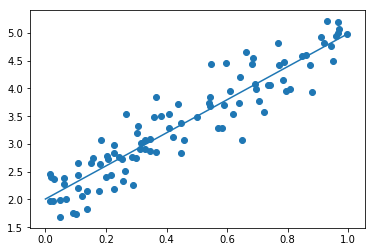

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 非線形回帰

Generation: 100. 誤差 = 37.94198
Generation: 200. 誤差 = 31.691406
Generation: 300. 誤差 = 26.272558
Generation: 400. 誤差 = 21.610336
Generation: 500. 誤差 = 17.632326
Generation: 600. 誤差 = 14.268844
Generation: 700. 誤差 = 11.453
Generation: 800. 誤差 = 9.120853
Generation: 900. 誤差 = 7.211651
Generation: 1000. 誤差 = 5.668095
Generation: 1100. 誤差 = 4.4366603
Generation: 1200. 誤差 = 3.467935
Generation: 1300. 誤差 = 2.7169201
Generation: 1400. 誤差 = 2.143305
Generation: 1500. 誤差 = 1.7116346
Generation: 1600. 誤差 = 1.3913685
Generation: 1700. 誤差 = 1.1567731
Generation: 1800. 誤差 = 0.98671144
Generation: 1900. 誤差 = 0.86424476
Generation: 2000. 誤差 = 0.7761652
Generation: 2100. 誤差 = 0.71244955
Generation: 2200. 誤差 = 0.6656913
Generation: 2300. 誤差 = 0.6305524
Generation: 2400. 誤差 = 0.6032764
Generation: 2500. 誤差 = 0.5812669
Generation: 2600. 誤差 = 0.5627548
Generation: 2700. 誤差 = 0.5465425
Generation: 2800. 誤差 = 0.53182054
Generation: 2900. 誤差 = 0.51803607
Generation: 3000. 誤差 = 0.50481063
Generation: 3100. 誤差 =

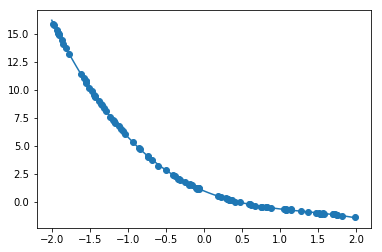

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## TRY

Generation: 1000. 誤差 = 851.37506
Generation: 2000. 誤差 = 288.32843
Generation: 3000. 誤差 = 129.70566
Generation: 4000. 誤差 = 62.19348
Generation: 5000. 誤差 = 20.950327
Generation: 6000. 誤差 = 3.8000784
Generation: 7000. 誤差 = 0.24075711
Generation: 8000. 誤差 = 0.002501791
Generation: 9000. 誤差 = 1.21216e-06
Generation: 10000. 誤差 = 6.4189667e-09
Generation: 11000. 誤差 = 2.3074056e-09
Generation: 12000. 誤差 = 8.4037205e-10
Generation: 13000. 誤差 = 2.6795358e-10
Generation: 14000. 誤差 = 1.106016e-10
Generation: 15000. 誤差 = 3.8634585e-11
Generation: 16000. 誤差 = 2.227313e-11
Generation: 17000. 誤差 = 7.6279824e-12
Generation: 18000. 誤差 = 5.5941207e-12
Generation: 19000. 誤差 = 5.412066e-12
Generation: 20000. 誤差 = 7.219003e-12
Generation: 21000. 誤差 = 1.5833197e-10
Generation: 22000. 誤差 = 1.9946562e-09
Generation: 23000. 誤差 = 6.794317e-10
Generation: 24000. 誤差 = 5.7374272e-08
Generation: 25000. 誤差 = 1.554588e-08
Generation: 26000. 誤差 = 4.7183044e-09
Generation: 27000. 誤差 = 7.154047e-09
Generation: 28000. 誤差 

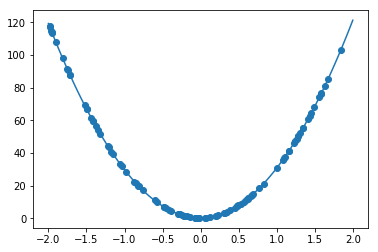

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 30000
plot_interval = 1000

input_layer_size = 3
output_layer_size = 1

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = 30. * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
# noise = 0.05
# d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, input_layer_size])
dt = tf.placeholder(tf.float32, [None, output_layer_size])
W = tf.Variable(tf.random_normal([input_layer_size, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape([n, output_layer_size])
x_train = np.zeros([n, input_layer_size])
for i in range(n):
    for j in range(input_layer_size):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])    

# 予測関数
def predict(x):
    result = 0.
    for i in range(0,input_layer_size):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## MNIST

W0707 11:07:11.076009 4637377984 deprecation.py:323] From <ipython-input-11-6ddfa8858690>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0707 11:07:11.078274 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0707 11:07:11.081386 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a futur

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0707 11:07:11.403290 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0707 11:07:11.406490 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0707 11:07:11.482144 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[False False False ... False False False]
Generation: 1. 正解率 = 0.26
[ True False False ... False False False]
Generation: 2. 正解率 = 0.4214
[ True False False ... False False False]
Generation: 3. 正解率 = 0.4788
[ True False  True ... False False  True]
Generation: 4. 正解率 = 0.3951
[ True False  True ... False False False]
Generation: 5. 正解率 = 0.591
[ True False  True ... False False  True]
Generation: 6. 正解率 = 0.6542
[ True False  True ... False False  True]
Generation: 7. 正解率 = 0.6502
[ True False  True ... False False  True]
Generation: 8. 正解率 = 0.7177
[ True  True  True ... False False  True]
Generation: 9. 正解率 = 0.7387
[ True False  True ...  True False  True]
Generation: 10. 正解率 = 0.7007
[ True False  True ...  True False  True]
Generation: 11. 正解率 = 0.7153
[ True False  True ...  True False  True]
Generation: 12. 正解率 = 0.7035
[ True False  T

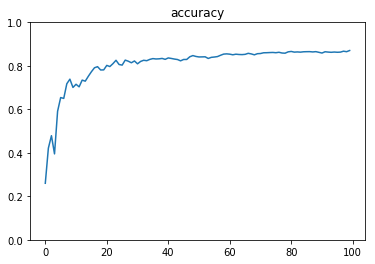

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


W0707 11:11:18.378411 4637377984 deprecation.py:506] From <ipython-input-15-ef5cb837c5d7>:31: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Generation: 100. 正解率 = 0.1872
Generation: 200. 正解率 = 0.3107
Generation: 300. 正解率 = 0.3907
Generation: 400. 正解率 = 0.4722
Generation: 500. 正解率 = 0.5824
Generation: 600. 正解率 = 0.6546
Generation: 700. 正解率 = 0.6949
Generation: 800. 正解率 = 0.725
Generation: 900. 正解率 = 0.7516
Generation: 1000. 正解率 = 0.7841
Generation: 1100. 正解率 = 0.8047
Generation: 1200. 正解率 = 0.8209
Generation: 1300. 正解率 = 0.8349
Generation: 1400. 正解率 = 0.843
Generation: 1500. 正解率 = 0.8533
Generation: 1600. 正解率 = 0.8604
Generation: 1700. 正解率 = 0.8651
Generation: 1800. 正解率 = 0.8705
Generation: 1900. 正解率 = 0.8752
Generation: 2000. 正解率 = 0.8786
Generation: 2100. 正解率 = 0.8836
Generation: 2200. 正解率 = 0.887
Generation: 2300. 正解率 = 0.889
Generation: 2400. 正解率 = 0.8921
Generation: 2500. 正解率 = 0.8946
Generation: 2600. 正解率 = 0.8963
Generation: 2700. 正解率 = 0.8997
Generation: 2800. 正解率 = 0.9004
Generation: 2900. 正解率 = 0.9018
Generation: 3000. 正解率 = 0.9046


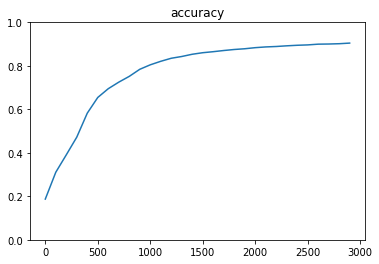

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.25
Generation: 20. 正解率 = 0.45
Generation: 30. 正解率 = 0.55
Generation: 40. 正解率 = 0.65
Generation: 50. 正解率 = 0.75
Generation: 60. 正解率 = 0.77
Generation: 70. 正解率 = 0.89
Generation: 80. 正解率 = 0.81
Generation: 90. 正解率 = 0.85
Generation: 100. 正解率 = 0.87
Generation: 110. 正解率 = 0.91
Generation: 120. 正解率 = 0.85
Generation: 130. 正解率 = 0.88
Generation: 140. 正解率 = 0.85
Generation: 150. 正解率 = 0.89
Generation: 160. 正解率 = 0.91
Generation: 170. 正解率 = 0.92
Generation: 180. 正解率 = 0.96
Generation: 190. 正解率 = 0.89
Generation: 200. 正解率 = 0.91
Generation: 210. 正解率 = 0.95
Generation: 220. 正解率 = 0.93
Generation: 230. 正解率 = 0.92
Generation: 240. 正解率 = 0.95
Generation: 250. 正解率 = 0.93
Generation: 260. 正解率 = 0.94
Generation: 270. 正解率 = 0.92
Generation: 280. 正解率 = 0.95
Generation: 290. 正解率 = 0.95
Gen

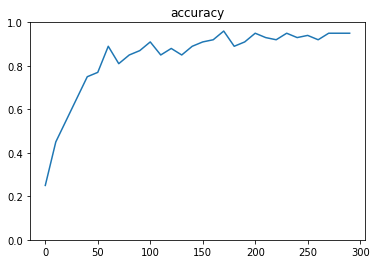

In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                

## Keras
### 線形回帰

Using TensorFlow backend.
W0707 11:15:09.642840 4637377984 deprecation_wrapper.py:119] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/koiketomoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  app.launch_new_instance()
W0707 11:15:09.657119 4637377984 deprecation_wrapper.py:119] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 11:15:09.663819 4637377984 deprecation_wrapper.py:119] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 11:15:09.70272

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 3.7994447
Generation: 20. 誤差 = 2.746627
Generation: 30. 誤差 = 2.017305
Generation: 40. 誤差 = 1.5072933
Generation: 50. 誤差 = 1.1466174
Generation: 60. 誤差 = 0.88819003
Generation: 70. 誤差 = 0.7002542
Generation: 80. 誤差 = 0.5613267
Generation: 90. 誤差 = 0.45681855
Generation: 100. 誤差 = 0.3767756
Generation: 110. 誤差 = 0.31436405
Generation: 120. 誤差 = 0.2648577
Generation: 130. 誤差 = 0.22495796
Generation: 140. 誤差 = 0.1923373
Generation: 150. 誤差 = 0.16533257
Generation: 160. 誤差 = 0.14273767
Generation: 170. 誤差 = 0.123664
Generation: 180. 誤差 = 0.10744535
Generation: 190. 誤差 = 0.093573205
Generation: 200. 誤差 = 0.081652425
Generation: 210. 誤差 = 0.07137054
Gene

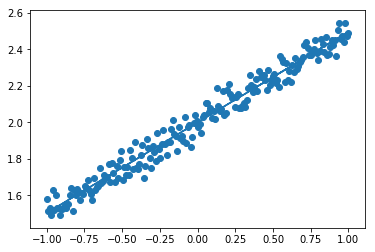

In [19]:
import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

## 単純パーセプトロン

In [20]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)



W0707 11:15:46.656192 4637377984 deprecation.py:323] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 85ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3717
Epoc

## iris

/Users/koiketomoki/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_2 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 0.9167 - acc: 0.4500 - val_loss: 0.7718 - val_acc: 0.7000
Epoch 2/20
120/120 [==============================] - 0s 643us/step - loss: 0.7480 - acc: 0.7333 - va

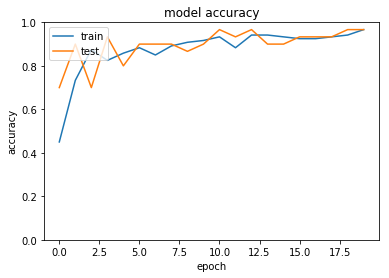

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.cross_validation import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()



## MNIST

In [23]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
23808/60000 [==========>...................] - ETA: 5s - loss: 0.3970 - acc

limit_output extension: Maximum message size of 10000 exceeded with 10042 characters

## CNN分類ーMNIST

In [24]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
x_train=x_train[:1000]
d_train=d_train[:1000]
x_test=x_test[:1000]
d_test=d_test[:1000]



# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

W0707 11:27:01.995805 4637377984 deprecation_wrapper.py:119] From /Users/koiketomoki/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

limit_output extension: Maximum message size of 10000 exceeded with 10087 characters

## cifar10

In [26]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()
x_train=x_train[:500]
d_train=d_train[:500]
x_test=x_test[:500]
d_test=d_test[:500]


#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Epoch 1/20
500/500 [==============================] - 3s 7ms/step - loss: 2.3033 - acc: 0.1200
Epoch 2/20
500/500 [==============================] - 3s 5ms/step - loss: 2.2334 - acc: 0.1720
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 2.1412 - acc: 0.2120
Epoch 4/20
500/500 [==============================] - 2s 5ms/step - loss: 2.0289 - acc: 0.2520
Epoch 5/20
 32/500 [>.............................] - ETA: 1s - loss: 1.

limit_output extension: Maximum message size of 10000 exceeded with 10018 characters

## RNN

In [27]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_17 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 1870/10000 [====>.........................] - ETA: 17s - loss: 0.2114 - acc: 0.73

limit_output extension: Maximum message size of 10000 exceeded with 10006 characters